In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path
import os
import skunk
import numpy as np
import os
import matplotlib.pyplot as plt
import shap
import pickle
import anndata as ad
import gzip
import numpy

In [68]:
mapping_cols = {
    'adas13': 'ADAS-Cog-13',
    'av45': 'Florbetapir (AV45)',
    'fdg': 'Fluorodeoxyglucose (FDG)',
    'mds_updrspartiii': 'MDS-UPDRS (partIII)',
    'mmse': 'MMSE',
    'moca': 'MoCA',
    'serum_nfl': 'Serum NfL',
}

In [69]:
with open("LIGHTGBM_MODEL/lightgbm_ad_shap.pkl", "rb") as f:
    ad_shap_data = pickle.load(f)
    
ad_shap_obj = ad_shap_data['shap_values']

with open("LIGHTGBM_MODEL/lightgbm_pd_shap.pkl", "rb") as f:
    pd_shap_data = pickle.load(f)
    
pd_shap_obj = pd_shap_data['shap_values']

def process_name(x):
    return x.replace('id_invicrot1_', '').replace('_', ' ')

replication_ad_imaging = ad.read("/Users/projects_data/project_MLPhenotypesMRIGWAS/ml_generated_data/23_03_30/predictiveModel/replication_ad_imaging.h5ad")
ad_shap_obj.feature_names = [process_name(col) for col in replication_ad_imaging.var.index]
replication_ad_imaging = ad.read("/Users/projects_data/project_MLPhenotypesMRIGWAS/ml_generated_data/23_03_30/predictiveModel/replication_pd_imaging.h5ad")
pd_shap_obj.feature_names = [process_name(col) for col in replication_ad_imaging.var.index]
# ax.text(x=0, y=1.03, s='B', fontsize=10, fontfamily='Times New Roman', horizontalalignment="left", verticalalignment="bottom",)


In [75]:
f = open("LIGHTGBM_MODEL/streamlitappfolder/ad_top20_feature_list.txt", 'w')
f.write('\n'.join(list(map(process_name, list(ad_shap_data['top20_features'])))))
f.close()

f = open("LIGHTGBM_MODEL/streamlitappfolder/pd_top20_feature_list.txt", 'w')
f.write('\n'.join(list(map(process_name, list(pd_shap_data['top20_features'])))))
f.close()

In [70]:
f = open("LIGHTGBM_MODEL/streamlitappfolder/feature_list.txt", 'w')
f.write('\n'.join(list(replication_ad_imaging.var.index)))
f.close()

In [71]:
f = gzip.GzipFile("LIGHTGBM_MODEL/streamlitappfolder/ad_shap_object_values.npy.gz", "w")
numpy.save(file=f, arr=np.array(ad_shap_obj.values, dtype=np.float16).round(2))
f.close()

f = gzip.GzipFile("LIGHTGBM_MODEL/streamlitappfolder/ad_shap_object_base_values.npy.gz", "w")
numpy.save(file=f, arr=ad_shap_obj.base_values)
f.close()

f = gzip.GzipFile("LIGHTGBM_MODEL/streamlitappfolder/ad_shap_object_data.npy.gz", "w")
numpy.save(file=f, arr=np.array(ad_shap_obj.data, dtype=np.float16).round(2))
f.close()

f = gzip.GzipFile("LIGHTGBM_MODEL/streamlitappfolder/ad_shap_object_feature_names.npy.gz", "w")
numpy.save(file=f, arr=np.array(ad_shap_obj.feature_names))
f.close()



In [72]:
f = gzip.GzipFile("LIGHTGBM_MODEL/streamlitappfolder/pd_shap_object_values.npy.gz", "w")
numpy.save(file=f, arr=np.array(pd_shap_obj.values, dtype=np.float16).round(2))
f.close()

f = gzip.GzipFile("LIGHTGBM_MODEL/streamlitappfolder/pd_shap_object_base_values.npy.gz", "w")
numpy.save(file=f, arr=pd_shap_obj.base_values)
f.close()

f = gzip.GzipFile("LIGHTGBM_MODEL/streamlitappfolder/pd_shap_object_data.npy.gz", "w")
numpy.save(file=f, arr=np.array(pd_shap_obj.data, dtype=np.float16).round(2))
f.close()

f = gzip.GzipFile("LIGHTGBM_MODEL/streamlitappfolder/pd_shap_object_feature_names.npy.gz", "w")
numpy.save(file=f, arr=np.array(pd_shap_obj.feature_names))
f.close()


In [73]:
!ls -lh LIGHTGBM_MODEL/streamlitappfolder

total 224424
drwxrwxr-x@  8 dadua2  NIH\Domain Users   256B May 11 19:46 MachineLearningStreamlitBase
-rw-rw-r--@  1 dadua2  NIH\Domain Users    23B Jul 10  2022 README.md
-rw-r--r--   1 dadua2  NIH\Domain Users   293K May 11 19:16 ad_reduced_lgb.pkl
-rw-r--r--   1 dadua2  NIH\Domain Users   778B May 11 22:11 ad_shap_object_base_values.npy.gz
-rw-r--r--   1 dadua2  NIH\Domain Users    40M May 11 22:11 ad_shap_object_data.npy.gz
-rw-r--r--   1 dadua2  NIH\Domain Users   6.0K May 11 22:11 ad_shap_object_feature_names.npy.gz
-rw-r--r--   1 dadua2  NIH\Domain Users    12M May 11 22:11 ad_shap_object_values.npy.gz
drwxrwxr-x@  5 dadua2  NIH\Domain Users   160B May 11 19:49 apps
-rw-r--r--   1 dadua2  NIH\Domain Users    34K May 11 22:10 feature_list.txt
-rw-r--r--   1 dadua2  NIH\Domain Users   296K May 11 19:24 pd_reduced_lgb.pkl
-rw-r--r--   1 dadua2  NIH\Domain Users   823B May 11 22:11 pd_shap_object_base_values.npy.gz
-rw-r--r--   1 dadua2  NIH\Domain Users    43M May 11 22:12 pd_shap_

In [60]:
# ad_shap_obj

<AxesSubplot:>

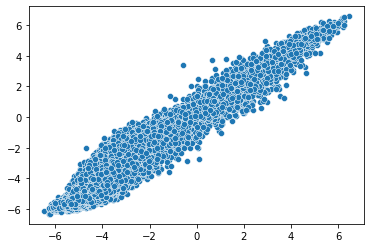

In [12]:
sns.scatterplot(x=ad_shap_data['lightgbm_predictions'], y=ad_shap_data['true_probabilities'])

<AxesSubplot:>

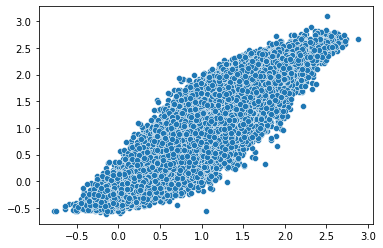

In [13]:
sns.scatterplot(x=pd_shap_data['lightgbm_predictions'], y=pd_shap_data['true_probabilities'])

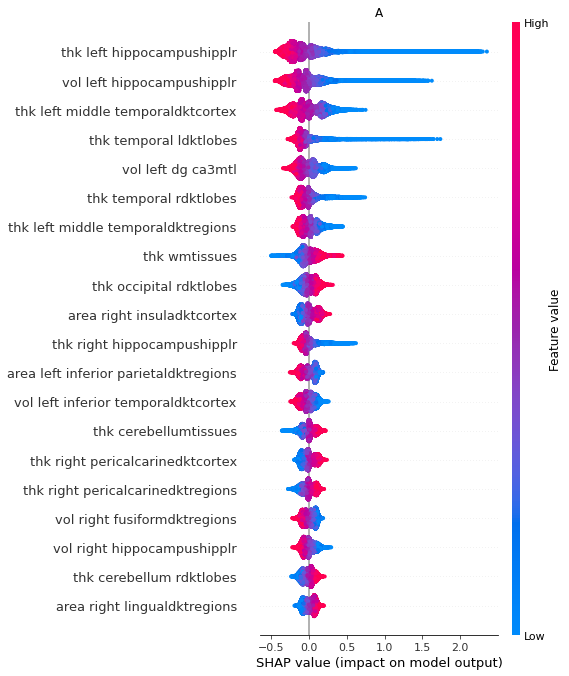

In [14]:
fig, ax = plt.subplots(figsize=(10,15))
# shap.plots.beeswarm(ad_shap_obj, max_display=20, show=True) # color=plt.get_cmap("PiYGx"))
shap.summary_plot(ad_shap_obj, max_display=20, show=False, title='A') # color=plt.get_cmap("PiYGx"))
plt.title('A')
plt.tight_layout()

fig.savefig('Step4_shap_associations/ad_shap_beeswarn.svg', bbox_inches='tight')

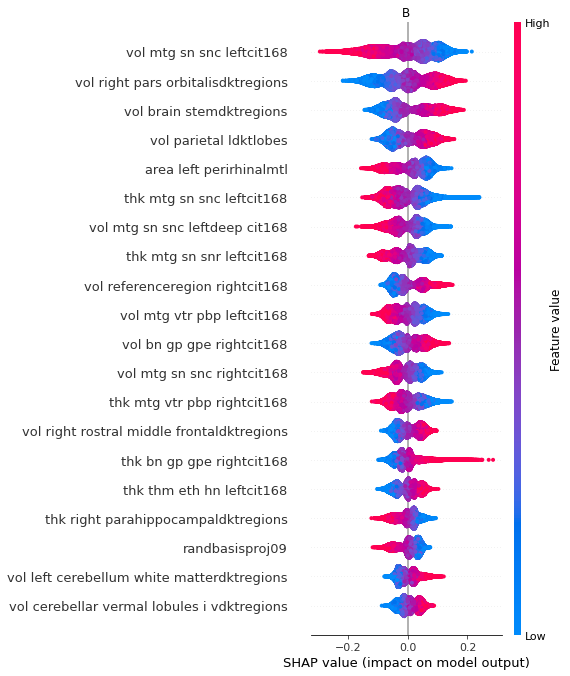

In [15]:
fig, ax = plt.subplots(figsize=(10,15))
# shap.plots.beeswarm(ad_shap_obj, max_display=20, show=True) # color=plt.get_cmap("PiYGx"))
shap.summary_plot(pd_shap_obj, max_display=20, show=False) # color=plt.get_cmap("PiYGx"))
plt.title('B')
plt.tight_layout()
fig.savefig('Step4_shap_associations/pd_shap_beeswarn.svg', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

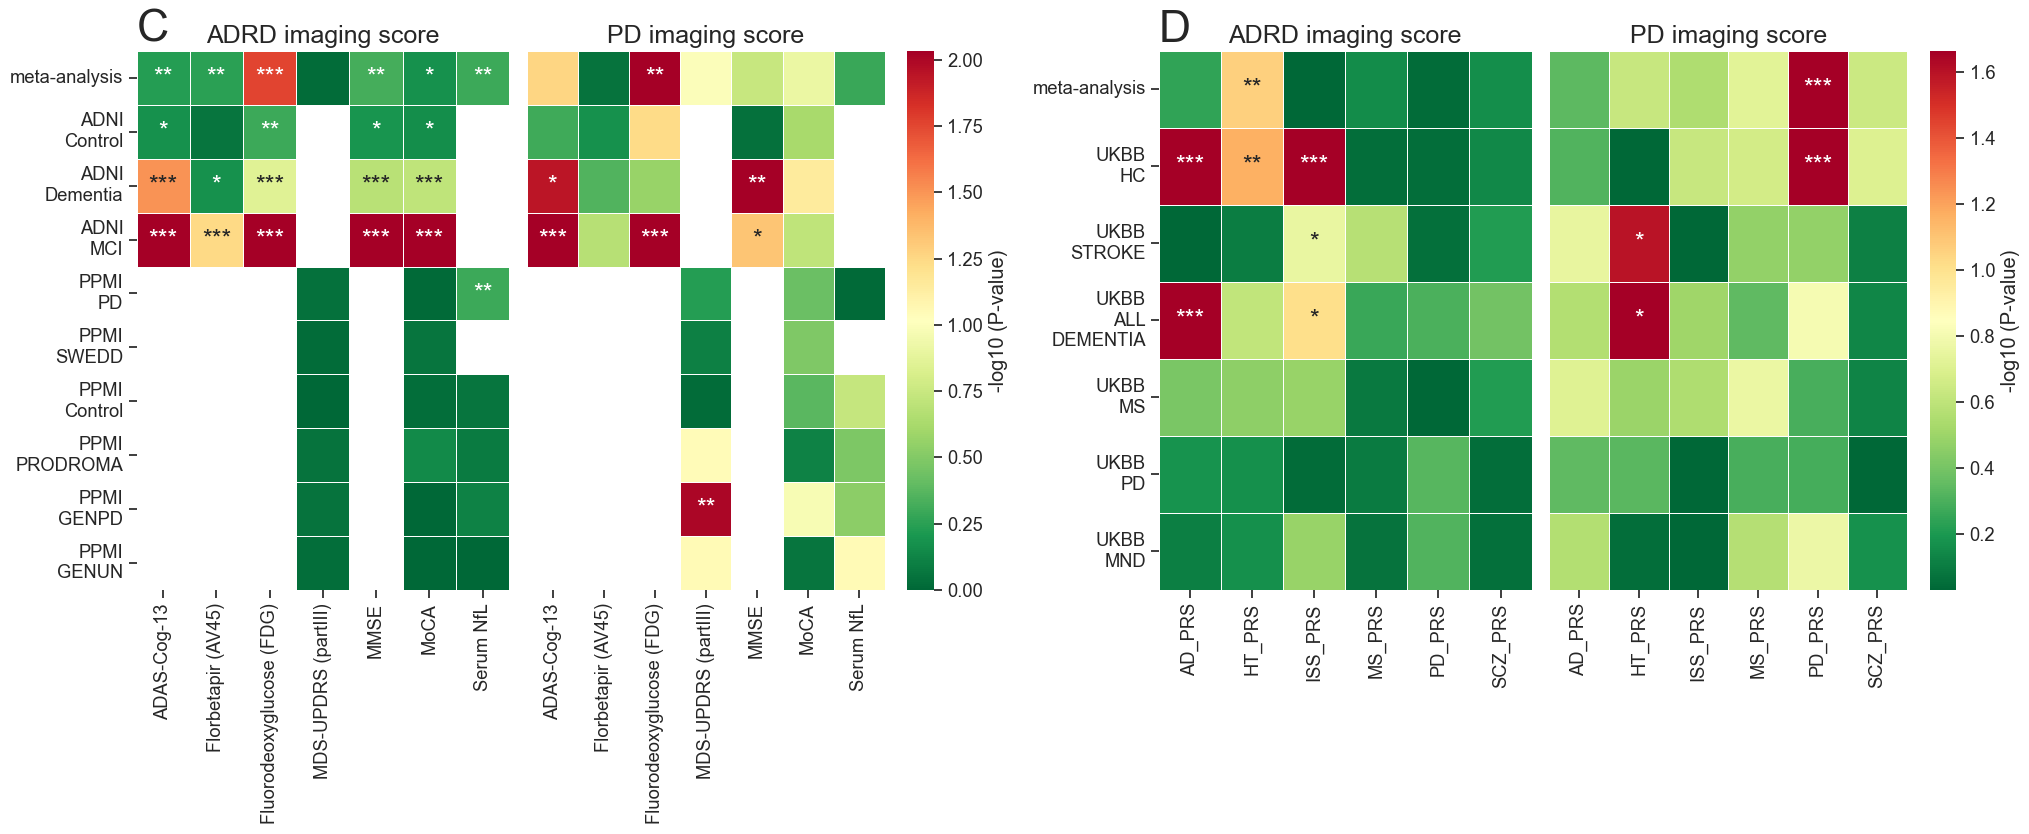

In [87]:
import numpy as np
# Create a dataframe
import seaborn as sns
import pandas as pd
sns.reset_defaults()
mpl.rcParams.update(mpl.rcParamsDefault)
sns.set_theme("notebook", font_scale=1.2, rc={"lines.linewidth": 1.5})
sns.set_style("white", )
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.despine()

def mp(x):
    return mapping_cols.get(x, x)
    
mapping = {}
fig, (ax1, ax2, axd, ax3, ax4) = plt.subplots(figsize=(24, 7), gridspec_kw={'width_ratios': [2.5, 3, 1, 2.5, 3]}, ncols=5)

mypath = Path("/Users/Downloads/genomicsImages/association_test/biomarkers")
data = []
for fname in sorted(os.listdir(mypath)):
    if '.DS_Store' in fname:
        continue
    data.append(pd.read_csv(mypath / fname))
    data[-1]['effect_outcome'] = fname.split('.')[0]
    
data_df = pd.concat(data)
heatmap_data = pd.DataFrame(index=data_df['effect_outcome'].unique(), columns=data_df['study'].unique())

for i in range(len(data_df)):
    heatmap_data.loc[data_df.iloc[i]['effect_outcome']][data_df.iloc[i]['study']] = data_df.iloc[i]['P-value (-log10)'] # data_df.iloc[i]['BETA'] #  (-log10)
    
heatmap_data = heatmap_data.transpose()
annot_new_results = pd.DataFrame(index=data_df['effect_outcome'].unique(), columns=data_df['study'].unique())
for i in range(len(data_df)):
    if data_df.iloc[i]['P-value'] < 0.001:
        strr = '***'
    elif data_df.iloc[i]['P-value'] < 0.01:
        strr = '**'
    elif data_df.iloc[i]['P-value'] < 0.05:
        strr = '*'
    else:
        strr = ''
    annot_new_results.loc[data_df.iloc[i]['effect_outcome']][data_df.iloc[i]['study']] = f"{strr}"# f"{round(data_df.iloc[i]['BETA'], 2)}{strr}"
annot_new_results = annot_new_results.transpose()

X = heatmap_data.loc[:, heatmap_data.columns.str.contains('AD_score')]
A = annot_new_results.loc[:, X.columns]
selected_columns_all = X.columns
vmax = np.percentile(X.fillna(0).values, 95) # X.max().max()
vmin = np.percentile(X.fillna(0).values, 5) # X.min().min()
sns.heatmap(np.array(X.round(2).values, dtype=float), cmap='RdYlGn_r', linewidths=0.5, #RdYlGn_r
                annot=A.values, 
                xticklabels=[mp(j.split('&')[0].replace('_AD_score', '')) for j in X.columns], 
                yticklabels= [j.split('&')[0].replace('_', '\n').replace('cs/', '') for j in X.index], 
                vmax=vmax,
                vmin=vmin,
                cbar=None,
                fmt='',
                annot_kws={'fontsize': 18}, # , 'fontfamily': 'Times New Roman'
                ax=ax1)
ax1.set_title("ADRD imaging score", fontsize=18)


X = heatmap_data.loc[:, heatmap_data.columns.str.contains('PD_score')]
A = annot_new_results.loc[:, X.columns]
selected_columns_all = X.columns
vmax = np.nanpercentile(X.fillna(0).values, 95) # X.max().max()
vmin = np.nanpercentile(X.fillna(0).values, 5) # X.min().min()
sns.heatmap(np.array(X.round(2).values, dtype=float), cmap='RdYlGn_r', linewidths=0.5, #RdYlGn_r
                annot=A.values, 
                xticklabels=[mp(j.split('&')[0].replace('_PD_score', '')) for j in X.columns], 
                yticklabels=[], # [mapping.get(j, j) for j in X.index], 
                vmax=vmax,
                vmin=vmin,
                cbar=True,
                cbar_kws={'label': '-log10 (P-value)'},
                fmt='',
                annot_kws={'fontsize': 18,},
                ax=ax2)
ax2.set_title("PD imaging score", fontsize=18)




import numpy as np

mypath = Path("/Users/Downloads/genomicsImages/association_test/NEW_PRS/Independent")
data = []
for fname in sorted(os.listdir(mypath)):
    # print (fname)
    if not '.csv' in fname:
        continue
    data.append(pd.read_csv(mypath / fname))
    data[-1]['effect_outcome'] = fname.split('.')[0]
    
data_df = pd.concat(data)
heatmap_data = pd.DataFrame(index=data_df['effect_outcome'].unique(), columns=data_df['study'].unique())
for i in range(len(data_df)):
    heatmap_data.loc[data_df.iloc[i]['effect_outcome']][data_df.iloc[i]['study']] = data_df.iloc[i]['P-value (-log10)']#  -np.log10()# data_df.iloc[i]['BETA'] #  (-log10)

heatmap_data = heatmap_data.transpose()
annot_new_results = pd.DataFrame(index=data_df['effect_outcome'].unique(), columns=data_df['study'].unique())
for i in range(len(data_df)):
    if data_df.iloc[i]['P-value'] < 0.001:
        strr = '***'
    elif data_df.iloc[i]['P-value'] < 0.01:
        strr = '**'
    elif data_df.iloc[i]['P-value'] < 0.05:
        strr = '*'
    else:
        strr = ''
    annot_new_results.loc[data_df.iloc[i]['effect_outcome']][data_df.iloc[i]['study']] = f"{strr}"# f"{round(data_df.iloc[i]['BETA'], 2)}{strr}"
    
annot_new_results = annot_new_results.transpose()


mapping = {}
# fig, (ax1, ax2) = plt.subplots(figsize=(12, 6), gridspec_kw={'width_ratios': [2.5, 3]}, ncols=2)

X = heatmap_data.loc[:, heatmap_data.columns.str.contains('AD_score')]
A = annot_new_results.loc[:, X.columns]
selected_columns_all = X.columns
vmax = np.percentile(X.values, 95) # X.max().max()
vmin = np.percentile(X.values, 5) # X.min().min()
sns.heatmap(np.array(X.round(2).values, dtype=float), cmap='RdYlGn_r', linewidths=0.5, #RdYlGn_r
                annot=A.values, 
                xticklabels=[mp(j.split('&')[0].replace('AD_score_', '')) for j in X.columns], 
                yticklabels= [j.split('&')[0].replace('_', '\n').replace('cs/', '') for j in X.index], 
                vmax=vmax,
                vmin=vmin,
                cbar=None,
                fmt='',
                annot_kws={'fontsize': 18}, # , 'fontfamily': 'Times New Roman'
                ax=ax3)
ax3.set_title("ADRD imaging score", fontsize=18)

X = heatmap_data.loc[:, heatmap_data.columns.str.contains('PD_score')]
A = annot_new_results.loc[:, X.columns]
selected_columns_all = X.columns
vmax = np.percentile(X.values, 95) # X.max().max()
vmin = np.percentile(X.values, 5) # X.min().min()
sns.heatmap(np.array(X.round(2).values, dtype=float), cmap='RdYlGn_r', linewidths=0.5, #RdYlGn_r
                annot=A.values,
                xticklabels=[mp(j.split('&')[0].replace('PD_score_', '')) for j in X.columns], 
                yticklabels=[], # [mapping.get(j, j) for j in X.index], 
                vmax=vmax,
                vmin=vmin,
                cbar=True,
                cbar_kws={'label': '-log10 (P-value)'},
                fmt='',
                annot_kws={'fontsize': 18,},
                ax=ax4)
ax4.set_title("PD imaging score", fontsize=18)
fig.delaxes(axd)
fig.subplots_adjust(wspace=0.05, hspace=0.2)
ax1.text(x=0, y=0, s='C', fontsize=32, horizontalalignment="left", verticalalignment="bottom",)
# ax1.text(x=0, y=1.03, s='C', fontsize=10, fontfamily='Times New Roman', horizontalalignment="left", verticalalignment="bottom",)
ax3.text(x=0, y=0, s='D', fontsize=32, horizontalalignment="left", verticalalignment="bottom",)

# ax3.text(x=0, y=1.03, s='D', fontsize=10, fontfamily='Times New Roman', horizontalalignment="left", verticalalignment="bottom",)

# plt.tight_layout()
plt.savefig('Step4_shap_associations/association_testing.svg', bbox_inches='tight')
plt.savefig('Step4_shap_associations/association_testing.png', dpi=200, bbox_inches='tight')
# plt.savefig('Step4_shap_associations/biomarker_testing.svg')
# plt.savefig('Step4_shap_associations/biomarker_testing.png', dpi=200)

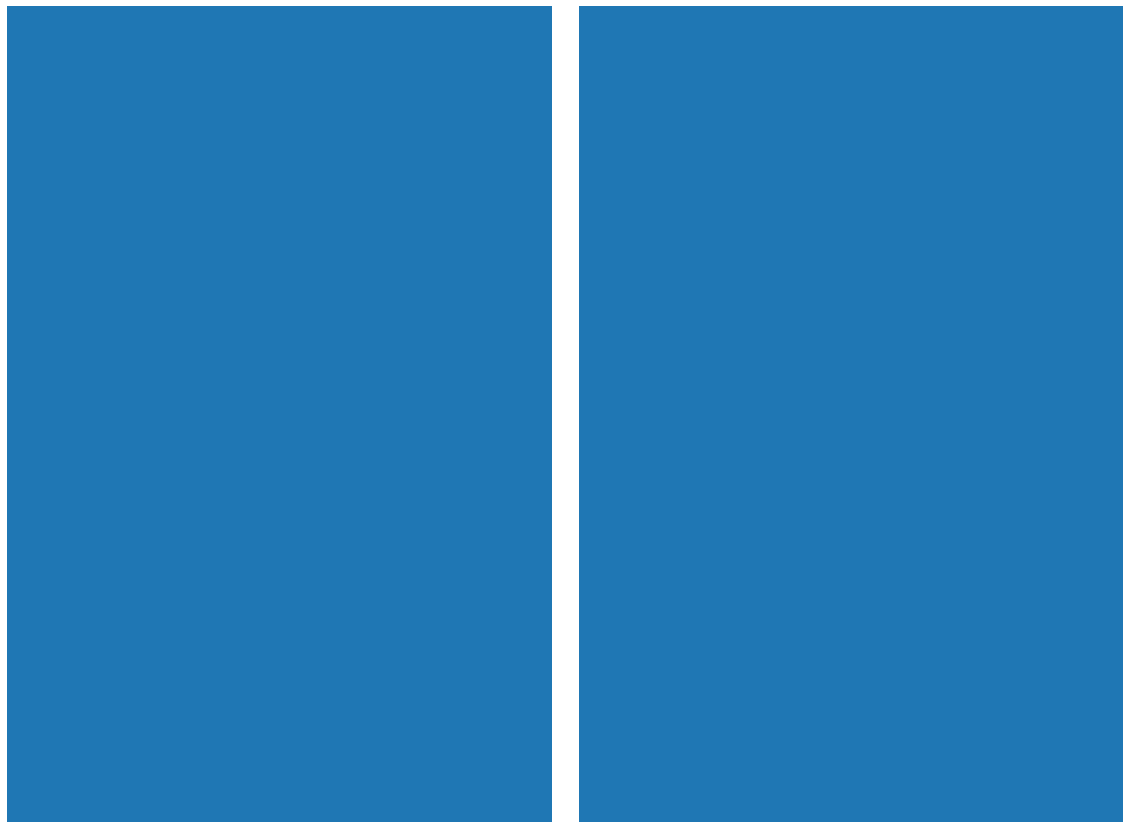

In [16]:
svgs = ['Step4_shap_associations/ad_shap_beeswarn.svg', 'Step4_shap_associations/pd_shap_beeswarn.svg']# , 'Step4_shap_associations/association_testing.svg']
svg = skunk.layout_svgs(svgs, labels=None, outline=False, shape=(1, 2), figsize=(20, 15))
# svg = skunk.layout_svgs(svgs, labels=None, outline=False, shape=(1, 2))

# nsvg = skunk.layout_svgs([svg,  'Step4_shap_associations/association_testing.svg'], labels=None, outline=None, shape=(2, 1), figsize=(20, 30))
# skunk.display(svg)
with open('Step4_shap_associations/ad_pd_shap_beeswarn.svg', 'w') as f:
    _ = f.write(svg)
    
# from svglib.svglib import svg2rlg
# from reportlab.graphics import renderPM

# read svg -> write png
# renderPM.drawToFile(svg2rlg('Step4_shap_associations/ad_pd_shap_beeswarn.svg'), 'output.png', fmt='PNG')